In [16]:
import os
os.environ['OMP_NUM_THREADS'] = '1'

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import cluster
from sklearn import mixture
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

plt.rcParams['font.family']='Malgun Gothic'
plt.rcParams['axes.unicode_minus']=False

from yellowbrick.cluster import SilhouetteVisualizer

In [46]:
import pandas as pd
df_final = pd.read_csv('취업자_연금대상자_수급자.csv')
df1 = df_final.drop('Unnamed: 0', axis=1)
df1

,구,동,계,비율,장애인취업자,대상자_수,수급자_수
0,강남구,대치1동,282.0,0.018575,13.0,70.0,45.0
1,강남구,세곡동,1942.0,0.127915,89.0,483.0,308.0
2,강남구,도곡1동,380.0,0.025030,17.0,95.0,60.0
3,강남구,신사동,396.0,0.026084,18.0,98.0,63.0
4,강남구,논현1동,548.0,0.036095,25.0,136.0,87.0
...,...,...,...,...,...,...,...
421,중랑구,면목2동,1239.0,0.060864,8.0,244.0,176.0
422,중랑구,망우본동,1777.0,0.087292,11.0,349.0,253.0
423,중랑구,중화1동,941.0,0.046225,6.0,185.0,134.0
424,중랑구,상봉2동,842.0,0.041362,5.0,165.0,120.0


In [ ]:
# 비율 : 각각의 구 대비 동 장애인 인구 비율

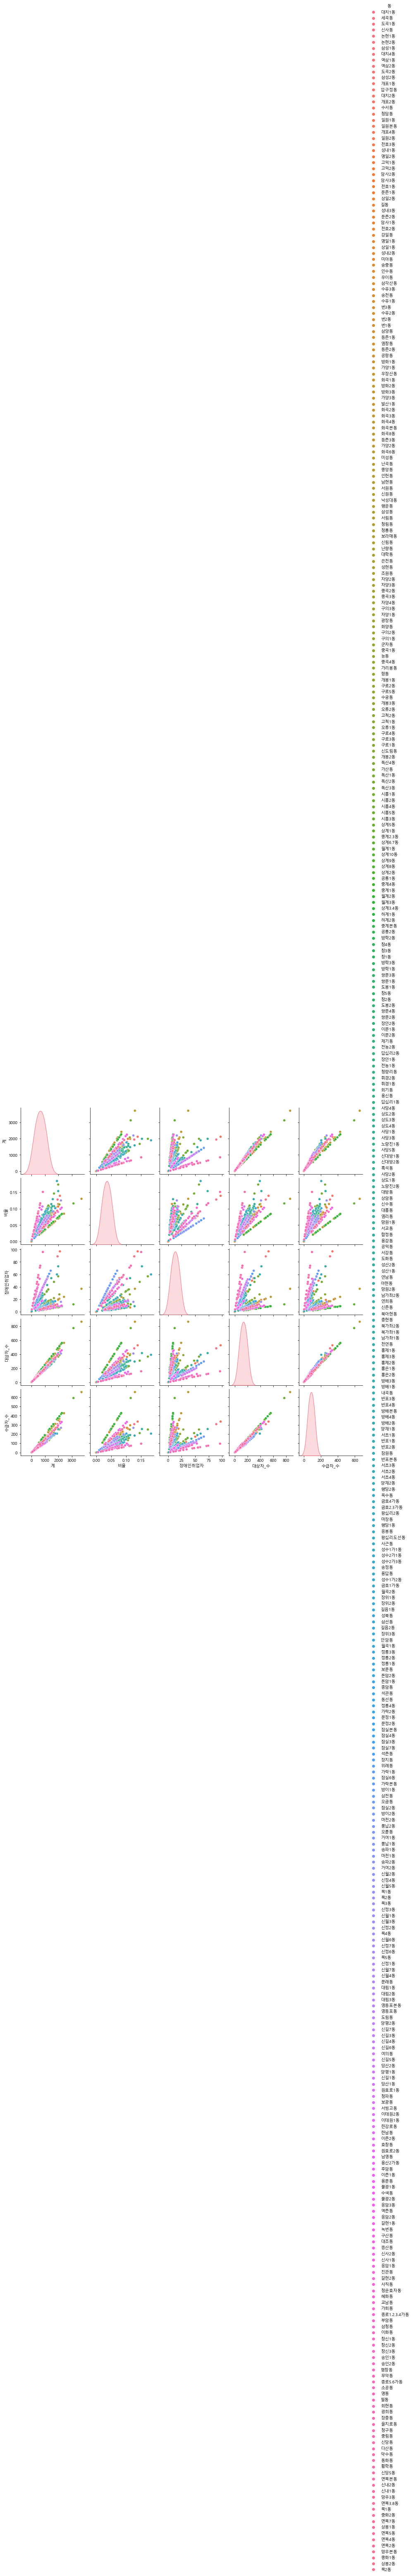

In [9]:
sns.pairplot(df1, hue='동')
plt.show()

In [24]:
df2 = df1.drop(columns=['계','비율'], axis=1)
df2

,구,동,장애인취업자,대상자_수,수급자_수
0,강남구,대치1동,13.0,70.0,45.0
1,강남구,세곡동,89.0,483.0,308.0
2,강남구,도곡1동,17.0,95.0,60.0
3,강남구,신사동,18.0,98.0,63.0
4,강남구,논현1동,25.0,136.0,87.0
...,...,...,...,...,...
421,중랑구,면목2동,8.0,244.0,176.0
422,중랑구,망우본동,11.0,349.0,253.0
423,중랑구,중화1동,6.0,185.0,134.0
424,중랑구,상봉2동,5.0,165.0,120.0


In [28]:
df3 = df2.set_index('동')
df3

,구,장애인취업자,대상자_수,수급자_수
동,,,,
대치1동,강남구,13.0,70.0,45.0
세곡동,강남구,89.0,483.0,308.0
도곡1동,강남구,17.0,95.0,60.0
신사동,강남구,18.0,98.0,63.0
논현1동,강남구,25.0,136.0,87.0
...,...,...,...,...
면목2동,중랑구,8.0,244.0,176.0
망우본동,중랑구,11.0,349.0,253.0
중화1동,중랑구,6.0,185.0,134.0


In [29]:
df4 = df3.drop(columns=['구'],axis=1)
df4

,장애인취업자,대상자_수,수급자_수
동,,,
대치1동,13.0,70.0,45.0
세곡동,89.0,483.0,308.0
도곡1동,17.0,95.0,60.0
신사동,18.0,98.0,63.0
논현1동,25.0,136.0,87.0
...,...,...,...
면목2동,8.0,244.0,176.0
망우본동,11.0,349.0,253.0
중화1동,6.0,185.0,134.0


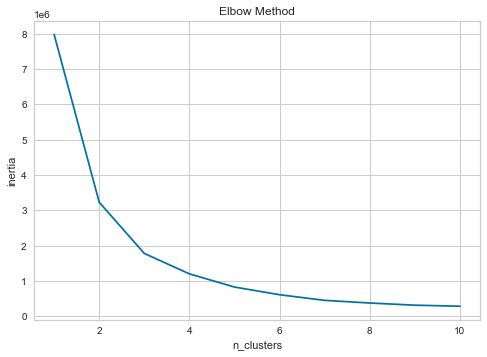

In [30]:
inertia_list = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(df4)
    inertia_list.append(kmeans.inertia_)
    
plt.plot(range(1, 11), inertia_list)
plt.title('Elbow Method')
plt.xlabel('n_clusters')
plt.ylabel('inertia')
plt.show()

In [31]:
df5 = pd.DataFrame(data=df4, columns=['장애인취업자','대상자_수','수급자_수'])
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, random_state=0)
kmeans.fit(df5)
df5['cluster'] = kmeans.labels_

score_samples = silhouette_samples(df4, df5['cluster'])
print(score_samples.shape)
print(score_samples)
df5['silhoutte_coeff'] = score_samples

average_score = silhouette_score(df4, df5['cluster'])
print(average_score)

(426,)
[ 0.66381502  0.24488407  0.69496163  0.68911723  0.2969614   0.46980884
  0.66846024  0.69124147  0.58302156  0.3026658   0.55009195  0.11862441
  0.61454206  0.51202871  0.04412472  0.39801056  0.41922805  0.55009195
  0.21967616  0.54149114  0.23424505  0.43841988  0.28097082  0.3707751
  0.68312223  0.18263581  0.46708208  0.66901767  0.60983357  0.52324907
  0.46595739  0.61871159  0.39612692  0.62100585  0.67646642  0.60812694
  0.61095691  0.61196896  0.59450979  0.65488678  0.5904275   0.26544918
  0.56473631  0.58208997  0.59098861  0.25654118  0.35337231  0.61468414
  0.33417143  0.29875424  0.42852101  0.48341582  0.62305249  0.4681718
  0.60739531  0.0955773   0.54235965  0.6093952   0.15033986  0.65670098
  0.58288699  0.49815521  0.4924551   0.40114764  0.38969368  0.59570993
  0.62000939  0.66260542  0.16227161  0.61478313  0.05247453  0.38319711
  0.5927106   0.31727883  0.30927873  0.59017711  0.62350386  0.53187717
  0.66688636 -0.00477871  0.35277915  0.681371

#### 실루엣 K=4

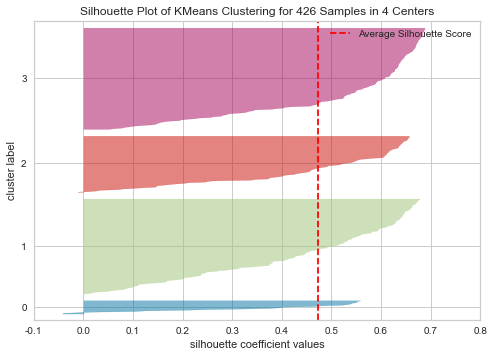

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 426 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [32]:
kmeans_4 = KMeans(n_clusters=4, random_state=200,init='random')
visualizer_4 = SilhouetteVisualizer(kmeans_4, colors='yellowbrick')
visualizer_4.fit(df5)      
visualizer_4.show()

#### 실루엣 K=5

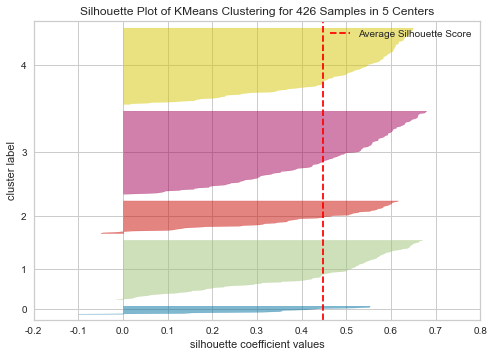

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 426 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [33]:
kmeans_5 = KMeans(n_clusters=5, random_state=200,init='random')
visualizer_5 = SilhouetteVisualizer(kmeans_5, colors='yellowbrick')
visualizer_5.fit(df5)      
visualizer_5.show()

#### 실루엣 K=6

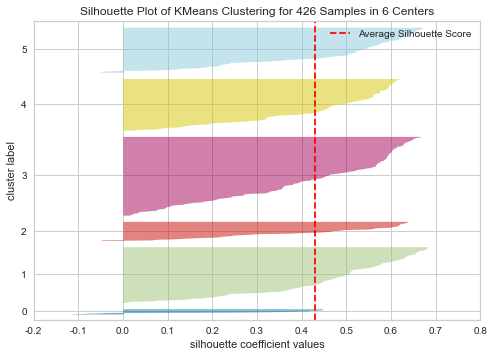

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 426 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [34]:
kmeans_6 = KMeans(n_clusters=6, random_state=200,init='random')
visualizer_6 = SilhouetteVisualizer(kmeans_6, colors='yellowbrick')
visualizer_6.fit(df5)      
visualizer_6.show()

In [36]:
result_df = df5.copy()

#클러스터ID 컬럼 생성 
result_df.loc[:,'clusterID'] = visualizer_6.predict(df5)
#실루엣 계수 컬럼 생성
result_df.loc[:,'silhouette coefficient'] = visualizer_6.silhouette_samples_

result_df.shape
result_df.head(5)

,장애인취업자,대상자_수,수급자_수,cluster,silhoutte_coeff,clusterID,silhouette coefficient
동,,,,,,,
대치1동,13.0,70.0,45.0,0,0.663815,4,0.612040
세곡동,89.0,483.0,308.0,2,0.244884,2,0.278776
도곡1동,17.0,95.0,60.0,0,0.694962,4,0.270717
신사동,18.0,98.0,63.0,0,0.689117,4,0.135891
논현1동,25.0,136.0,87.0,0,0.296961,3,0.625601


In [37]:
print('전체 데이터의 실루엣 계수 평균')
result_df['silhouette coefficient'].mean()

print('\n군집별 실루엣 계수 평균')
result_df.groupby('clusterID')['silhouette coefficient'].mean().reset_index()

전체 데이터의 실루엣 계수 평균

군집별 실루엣 계수 평균


,clusterID,silhouette coefficient
0,0,0.236503
1,1,0.459816
2,2,0.407287
3,3,0.412381
4,4,0.434966
5,5,0.455114


In [38]:
result_df[result_df.cluster == 0]

,장애인취업자,대상자_수,수급자_수,cluster,silhoutte_coeff,clusterID,silhouette coefficient
동,,,,,,,
대치1동,13.0,70.0,45.0,0,0.663815,4,0.612040
도곡1동,17.0,95.0,60.0,0,0.694962,4,0.270717
신사동,18.0,98.0,63.0,0,0.689117,4,0.135891
논현1동,25.0,136.0,87.0,0,0.296961,3,0.625601
논현2동,23.0,127.0,81.0,0,0.469809,3,0.627232
...,...,...,...,...,...,...,...
다산동,74.0,120.0,74.0,0,0.342423,3,0.244927
동화동,48.0,78.0,48.0,0,0.607368,4,0.406948
황학동,56.0,91.0,56.0,0,0.568863,4,0.194571


In [ ]:
# K=6이나 K=5 괜찮음!

In [40]:
child = pd.read_csv('노인과아동.csv', index_col=0)
child

,인구수,구,동,장애노인_1인가구_추정수
0,4,강남구,개포1동,36
1,38,강남구,개포2동,89
2,44,강남구,개포4동,105
3,25,강남구,논현1동,92
4,15,강남구,논현2동,86
...,...,...,...,...
421,30,중랑구,중화1동,158
422,35,중랑구,중화2동,252
423,0,중구,소공동,6
424,0,중구,을지로동,15


In [45]:
child = child.rename(columns={'인구수':'장애아동_인구수'})
child

,장애아동_인구수,구,동,장애노인_1인가구_추정수
0,4,강남구,개포1동,36
1,38,강남구,개포2동,89
2,44,강남구,개포4동,105
3,25,강남구,논현1동,92
4,15,강남구,논현2동,86
...,...,...,...,...
421,30,중랑구,중화1동,158
422,35,중랑구,중화2동,252
423,0,중구,소공동,6
424,0,중구,을지로동,15


In [51]:
final = child.merge(df1, how='outer', on=['구','동'])
final

,장애아동_인구수,구,동,장애노인_1인가구_추정수,계,비율,장애인취업자,대상자_수,수급자_수
0,4,강남구,개포1동,36,213.0,0.014030,10.0,53.0,34.0
1,38,강남구,개포2동,89,528.0,0.034778,24.0,131.0,84.0
2,44,강남구,개포4동,105,623.0,0.041035,29.0,155.0,99.0
3,25,강남구,논현1동,92,548.0,0.036095,25.0,136.0,87.0
4,15,강남구,논현2동,86,510.0,0.033592,23.0,127.0,81.0
...,...,...,...,...,...,...,...,...,...
421,30,중랑구,중화1동,158,941.0,0.046225,6.0,185.0,134.0
422,35,중랑구,중화2동,252,1496.0,0.073488,9.0,294.0,213.0
423,0,중구,소공동,6,36.0,0.006390,4.0,7.0,4.0
424,0,중구,을지로동,15,89.0,0.015797,10.0,16.0,10.0


In [52]:
final = final.drop(columns=['계','비율'], axis=1)
final

,장애아동_인구수,구,동,장애노인_1인가구_추정수,장애인취업자,대상자_수,수급자_수
0,4,강남구,개포1동,36,10.0,53.0,34.0
1,38,강남구,개포2동,89,24.0,131.0,84.0
2,44,강남구,개포4동,105,29.0,155.0,99.0
3,25,강남구,논현1동,92,25.0,136.0,87.0
4,15,강남구,논현2동,86,23.0,127.0,81.0
...,...,...,...,...,...,...,...
421,30,중랑구,중화1동,158,6.0,185.0,134.0
422,35,중랑구,중화2동,252,9.0,294.0,213.0
423,0,중구,소공동,6,4.0,7.0,4.0
424,0,중구,을지로동,15,10.0,16.0,10.0


In [54]:
final.columns

Index(['장애아동_인구수', '구', '동', '장애노인_1인가구_추정수', '장애인취업자', '대상자_수', '수급자_수'], dtype='object')

In [55]:
final=final[['구', '동', '장애노인_1인가구_추정수','장애아동_인구수',  '장애인취업자', '대상자_수', '수급자_수']]

In [56]:
final

,구,동,장애노인_1인가구_추정수,장애아동_인구수,장애인취업자,대상자_수,수급자_수
0,강남구,개포1동,36,4,10.0,53.0,34.0
1,강남구,개포2동,89,38,24.0,131.0,84.0
2,강남구,개포4동,105,44,29.0,155.0,99.0
3,강남구,논현1동,92,25,25.0,136.0,87.0
4,강남구,논현2동,86,15,23.0,127.0,81.0
...,...,...,...,...,...,...,...
421,중랑구,중화1동,158,30,6.0,185.0,134.0
422,중랑구,중화2동,252,35,9.0,294.0,213.0
423,중구,소공동,6,0,4.0,7.0,4.0
424,중구,을지로동,15,0,10.0,16.0,10.0


In [57]:
final['미수급자']=final.대상자_수-final.수급자_수
final

,구,동,장애노인_1인가구_추정수,장애아동_인구수,장애인취업자,대상자_수,수급자_수,미수급자
0,강남구,개포1동,36,4,10.0,53.0,34.0,19.0
1,강남구,개포2동,89,38,24.0,131.0,84.0,47.0
2,강남구,개포4동,105,44,29.0,155.0,99.0,56.0
3,강남구,논현1동,92,25,25.0,136.0,87.0,49.0
4,강남구,논현2동,86,15,23.0,127.0,81.0,46.0
...,...,...,...,...,...,...,...,...
421,중랑구,중화1동,158,30,6.0,185.0,134.0,51.0
422,중랑구,중화2동,252,35,9.0,294.0,213.0,81.0
423,중구,소공동,6,0,4.0,7.0,4.0,3.0
424,중구,을지로동,15,0,10.0,16.0,10.0,6.0


In [58]:
final = final.drop(columns=['대상자_수','수급자_수'], axis=1)
final

,구,동,장애노인_1인가구_추정수,장애아동_인구수,장애인취업자,미수급자
0,강남구,개포1동,36,4,10.0,19.0
1,강남구,개포2동,89,38,24.0,47.0
2,강남구,개포4동,105,44,29.0,56.0
3,강남구,논현1동,92,25,25.0,49.0
4,강남구,논현2동,86,15,23.0,46.0
...,...,...,...,...,...,...
421,중랑구,중화1동,158,30,6.0,51.0
422,중랑구,중화2동,252,35,9.0,81.0
423,중구,소공동,6,0,4.0,3.0
424,중구,을지로동,15,0,10.0,6.0


In [59]:
final['지역']=final.구+'_'+final.동
final

,구,동,장애노인_1인가구_추정수,장애아동_인구수,장애인취업자,미수급자,지역
0,강남구,개포1동,36,4,10.0,19.0,강남구_개포1동
1,강남구,개포2동,89,38,24.0,47.0,강남구_개포2동
2,강남구,개포4동,105,44,29.0,56.0,강남구_개포4동
3,강남구,논현1동,92,25,25.0,49.0,강남구_논현1동
4,강남구,논현2동,86,15,23.0,46.0,강남구_논현2동
...,...,...,...,...,...,...,...
421,중랑구,중화1동,158,30,6.0,51.0,중랑구_중화1동
422,중랑구,중화2동,252,35,9.0,81.0,중랑구_중화2동
423,중구,소공동,6,0,4.0,3.0,중구_소공동
424,중구,을지로동,15,0,10.0,6.0,중구_을지로동


In [60]:
final = final.drop(columns=['구','동'], axis=1)
final

,장애노인_1인가구_추정수,장애아동_인구수,장애인취업자,미수급자,지역
0,36,4,10.0,19.0,강남구_개포1동
1,89,38,24.0,47.0,강남구_개포2동
2,105,44,29.0,56.0,강남구_개포4동
3,92,25,25.0,49.0,강남구_논현1동
4,86,15,23.0,46.0,강남구_논현2동
...,...,...,...,...,...
421,158,30,6.0,51.0,중랑구_중화1동
422,252,35,9.0,81.0,중랑구_중화2동
423,6,0,4.0,3.0,중구_소공동
424,15,0,10.0,6.0,중구_을지로동


In [61]:
final=final[['지역', '장애노인_1인가구_추정수','장애아동_인구수',  '장애인취업자', '미수급자']]
final

,지역,장애노인_1인가구_추정수,장애아동_인구수,장애인취업자,미수급자
0,강남구_개포1동,36,4,10.0,19.0
1,강남구_개포2동,89,38,24.0,47.0
2,강남구_개포4동,105,44,29.0,56.0
3,강남구_논현1동,92,25,25.0,49.0
4,강남구_논현2동,86,15,23.0,46.0
...,...,...,...,...,...
421,중랑구_중화1동,158,30,6.0,51.0
422,중랑구_중화2동,252,35,9.0,81.0
423,중구_소공동,6,0,4.0,3.0
424,중구_을지로동,15,0,10.0,6.0


### 찐최종

In [65]:
final = final.set_index('지역')
final

,장애노인_1인가구_추정수,장애아동_인구수,장애인취업자,미수급자
지역,,,,
강남구_개포1동,36,4,10.0,19.0
강남구_개포2동,89,38,24.0,47.0
강남구_개포4동,105,44,29.0,56.0
강남구_논현1동,92,25,25.0,49.0
강남구_논현2동,86,15,23.0,46.0
...,...,...,...,...
중랑구_중화1동,158,30,6.0,51.0
중랑구_중화2동,252,35,9.0,81.0
중구_소공동,6,0,4.0,3.0


In [81]:
final.mean()

장애노인_1인가구_추정수    154.995305
장애아동_인구수          31.528169
장애인취업자            16.525822
미수급자              61.699531
cluster            1.502347
dtype: float64

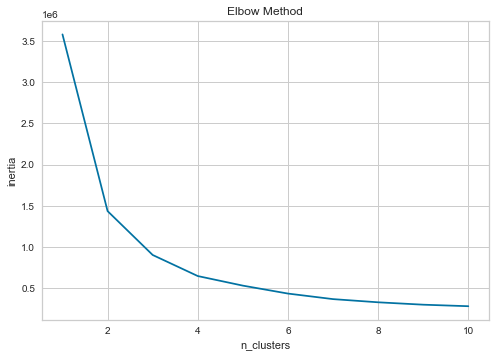

In [66]:
inertia_list = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(final)
    inertia_list.append(kmeans.inertia_)
    
plt.plot(range(1, 11), inertia_list)
plt.title('Elbow Method')
plt.xlabel('n_clusters')
plt.ylabel('inertia')
plt.show()

In [67]:
final_df = pd.DataFrame(data=final, columns=['장애노인_1인가구_추정수','장애아동_인구수','장애인취업자','미수급자'])
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, random_state=0)
kmeans.fit(final_df)
final_df['cluster'] = kmeans.labels_

score_samples = silhouette_samples(final, final_df['cluster'])
print(score_samples.shape)
print(score_samples)
final_df['silhoutte_coeff'] = score_samples

average_score = silhouette_score(final, final_df['cluster'])
print(average_score)

(426,)
[ 0.56425641  0.40156597 -0.01570898  0.42101618  0.52479724  0.60294243
  0.21168587  0.63287935  0.62519531  0.49738375  0.61134314  0.29324726
  0.24568874  0.28672984  0.6344896   0.5458464   0.31006921  0.04294721
 -0.03658305  0.22859819  0.22242952  0.51029959  0.37036502  0.18858258
  0.53065028  0.35332705  0.57461513  0.60351165  0.58586502  0.12557563
  0.42120063 -0.01784701  0.28684352  0.61611515  0.31125083  0.56336846
  0.23033183  0.59464408  0.37913528  0.44826507  0.17617433  0.51767441
  0.49120394  0.16340407  0.32332504  0.4910622   0.56548972  0.57684669
  0.30949006  0.30517431  0.24883161  0.48734737  0.22529217  0.45271767
  0.45720279  0.49626949  0.4778641   0.27723527  0.15492514  0.30115507
  0.58360072  0.22991843  0.58386705  0.21665521  0.21932284  0.33024423
  0.39352311  0.33318182  0.46926458  0.56876274  0.61344443  0.47745237
  0.58400324  0.59034733  0.47104024  0.05445528  0.49318607  0.34167041
  0.63450711  0.14916232  0.62669607  0.6166

#### K=4

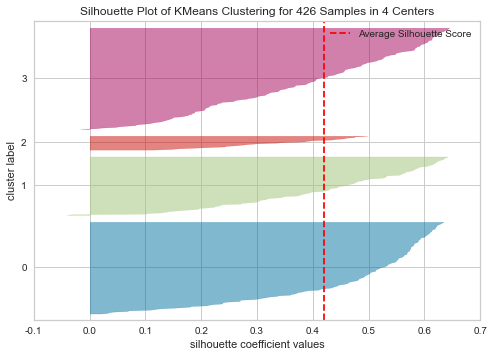

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 426 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [68]:
kmeans_4 = KMeans(n_clusters=4, random_state=200,init='random')
visualizer_4 = SilhouetteVisualizer(kmeans_4, colors='yellowbrick')
visualizer_4.fit(final_df)      
visualizer_4.show()

#### K=5

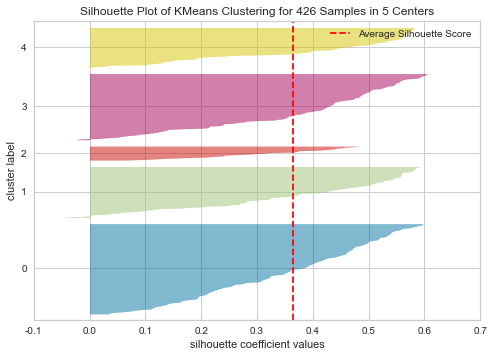

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 426 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [69]:
kmeans_5 = KMeans(n_clusters=5, random_state=200,init='random')
visualizer_5 = SilhouetteVisualizer(kmeans_5, colors='yellowbrick')
visualizer_5.fit(final_df)      
visualizer_5.show()

#### K=6

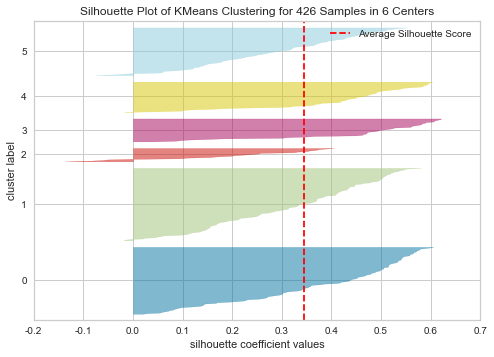

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 426 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [70]:
kmeans_6 = KMeans(n_clusters=6, random_state=200,init='random')
visualizer_6 = SilhouetteVisualizer(kmeans_6, colors='yellowbrick')
visualizer_6.fit(final_df)      
visualizer_6.show()

In [72]:
result_df = final_df.copy()

#클러스터ID 컬럼 생성 
result_df.loc[:,'clusterID'] = visualizer_6.predict(final_df)
#실루엣 계수 컬럼 생성
result_df.loc[:,'silhouette coefficient'] = visualizer_6.silhouette_samples_

result_df.shape
result_df.head(5)

,장애노인_1인가구_추정수,장애아동_인구수,장애인취업자,미수급자,cluster,silhoutte_coeff,clusterID,silhouette coefficient
지역,,,,,,,,
강남구_개포1동,36,4,10.0,19.0,3,0.564256,3,0.605405
강남구_개포2동,89,38,24.0,47.0,3,0.401566,0,0.492211
강남구_개포4동,105,44,29.0,56.0,1,-0.015709,0,0.139390
강남구_논현1동,92,25,25.0,49.0,3,0.421016,0,0.527444
강남구_논현2동,86,15,23.0,46.0,3,0.524797,0,0.543469


In [73]:
print('전체 데이터의 실루엣 계수 평균')
result_df['silhouette coefficient'].mean()

print('\n군집별 실루엣 계수 평균')
result_df.groupby('clusterID')['silhouette coefficient'].mean().reset_index()

전체 데이터의 실루엣 계수 평균

군집별 실루엣 계수 평균


,clusterID,silhouette coefficient
0,0,0.379875
1,1,0.318108
2,2,0.194029
3,3,0.452667
4,4,0.419082
5,5,0.281812


In [74]:
#케이민즈
kmeans = KMeans(n_clusters = 4, init='k-means++', max_iter=200, random_state=0).fit(final)
final['cluster'] = kmeans.labels_
print(kmeans.labels_)
#라벨링작업
marker0_ind = final[final['cluster']==0].index
marker1_ind = final[final['cluster']==1].index
marker2_ind = final[final['cluster']==2].index
marker3_ind = final[final['cluster']==3].index

print(marker0_ind)
print(marker1_ind)
print(marker2_ind)
print(marker3_ind)


[3 3 1 3 3 3 3 3 3 3 3 3 2 2 3 3 1 1 0 0 1 3 0 1 1 2 1 1 3 1 3 1 1 1 0 3 3
 0 0 0 1 1 0 2 0 0 0 0 0 1 1 1 0 1 2 0 0 1 1 2 0 0 0 2 1 0 2 1 1 1 1 1 0 3
 0 1 3 1 0 1 0 1 1 0 3 1 1 0 1 1 3 1 3 1 1 1 1 1 1 3 1 1 1 1 1 1 1 0 3 3 0
 0 1 1 0 3 0 1 0 1 0 1 1 2 3 1 2 1 0 1 0 1 3 1 0 2 0 3 2 1 0 0 0 1 1 1 2 2
 1 2 0 1 2 1 0 0 0 0 1 1 1 1 3 1 0 1 1 1 1 0 0 1 1 0 0 0 1 0 0 3 3 1 0 3 0
 1 1 1 3 3 0 1 0 0 1 1 1 0 3 1 1 1 0 1 1 1 2 1 1 3 3 3 3 3 0 1 0 3 3 0 1 1
 1 0 1 3 1 1 3 3 3 3 3 3 1 3 3 3 3 3 1 3 2 1 3 3 1 3 1 3 3 3 1 3 3 1 3 1 3
 3 3 1 1 3 3 1 3 3 1 0 3 3 0 1 0 1 3 1 1 1 1 0 3 1 1 3 1 0 0 3 3 3 1 1 1 1
 3 0 3 0 3 1 3 3 3 1 0 3 1 1 1 1 1 1 0 1 1 1 1 3 0 3 1 2 0 3 0 1 1 1 1 0 1
 1 1 1 3 3 1 3 1 3 1 1 1 3 3 3 3 3 3 3 3 3 3 3 1 3 3 3 1 1 0 2 0 0 0 0 3 0
 1 2 0 1 0 1 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 3 3 3 3 3 3
 1 0 0 0 0 3 1 0 0 1 0 1 2 0 1 0 3 3 3]
Index(['강남구_일원1동', '강남구_일원2동', '강동구_강일동', '강동구_암사1동', '강동구_천호1동', '강동구_천호2동',
       '강동구_천호3동', '강북구_번2동', '강북구_삼각산동', '강북구_삼양동', '강북구

In [92]:
grouped=final.groupby('cluster')

cluster0=pd.DataFrame(list(grouped)[0])
cluster0

,0
0,0
1,장애노인_1인가구_추정수 장애아동_인구수 장애인취업자 미수...


In [94]:
cluster0 = final[final['cluster']==0]
cluster1 = final[final['cluster']==1]
cluster2 = final[final['cluster']==2]
cluster3 = final[final['cluster']==3]

In [95]:
#클러스터 전처리
cluster0 = final[final['cluster']==0]
cluster1 = final[final['cluster']==1]
cluster2 = final[final['cluster']==2]
cluster3 = final[final['cluster']==3]



In [76]:
cluster0=cluster0.drop(columns=['cluster'])
cluster1=cluster1.drop(columns=['cluster'])
cluster2=cluster2.drop(columns=['cluster'])
cluster3=cluster3.drop(columns=['cluster'])


In [79]:
# 빈 데이터 프레임 만들기
clusters_ch = pd.DataFrame(columns=['장애노인_1인가구_추정수', '장애아동_인구수', '장애인취업자','미수급자'],index = ['cluster_1','cluster_2','cluster_3','cluster_4'])
# 클라스터 별 평균구하기
arr1=cluster0.mean()
arr2=cluster1.mean()
arr3=cluster2.mean()
arr4=cluster3.mean()


In [80]:
# 빈 데이터 프레임에 클러스터 넣기
clusters_ch.iloc[0] = arr1
clusters_ch.iloc[1] = arr2
clusters_ch.iloc[2] = arr3
clusters_ch.iloc[3] = arr4

clusters_ch

,장애노인_1인가구_추정수,장애아동_인구수,장애인취업자,미수급자
cluster_1,236.242105,44.968421,15.947368,89.673684
cluster_2,145.927273,30.521212,15.042424,59.612121
cluster_3,367.173913,65.956522,27.913043,137.0
cluster_4,77.356643,18.223776,16.79021,33.412587


In [82]:
cluster_1

NameError: name 'cluster_1' is not defined

In [99]:
final=final.reset_index()

In [103]:
 final['구'] = final.지역.apply(lambda x : x.split('_')[0])

In [106]:
 final['동'] = final.지역.apply(lambda x : x.split('_')[1])

In [108]:
final=final.drop(columns = ['지역'])
final

,장애노인_1인가구_추정수,장애아동_인구수,장애인취업자,미수급자,cluster,구,동
0,36,4,10.0,19.0,3,강남구,개포1동
1,89,38,24.0,47.0,3,강남구,개포2동
2,105,44,29.0,56.0,1,강남구,개포4동
3,92,25,25.0,49.0,3,강남구,논현1동
4,86,15,23.0,46.0,3,강남구,논현2동
...,...,...,...,...,...,...,...
421,158,30,6.0,51.0,1,중랑구,중화1동
422,252,35,9.0,81.0,0,중랑구,중화2동
423,6,0,4.0,3.0,3,중구,소공동
424,15,0,10.0,6.0,3,중구,을지로동


In [109]:
final.to_excel('final_final.xlsx')